In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix, mean_squared_error, classification_report

In [19]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/data (1).csv")
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [7]:
df.shape

(944, 10)

In [8]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [9]:
df.tail(10)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
934,1600,7,4,2,5,6,56,7,24,1
935,0,7,6,3,6,6,55,7,24,1
936,0,7,6,2,6,6,41,4,24,1
937,7300,1,2,3,6,0,43,7,24,0
938,16,7,7,1,7,6,34,3,24,1
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [11]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [12]:
failed_machines = df[df['fail'] == '1.0']
failed_machines.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail


In [13]:
failed_machines.shape

(0, 10)

In [14]:
passed_machines = df[df['fail'] != '1.0']
passed_machines.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [15]:
print(df.shape)
print(df.ndim)

(944, 10)
2


In [20]:
print("Missing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
df.describe()

Missing values:
 footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

Data Types:
 footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


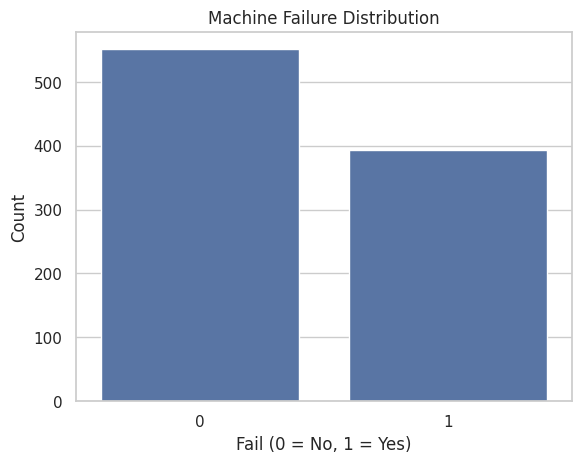

In [21]:
sns.countplot(x='fail', data=df)
plt.title("Machine Failure Distribution")
plt.xlabel("Fail (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

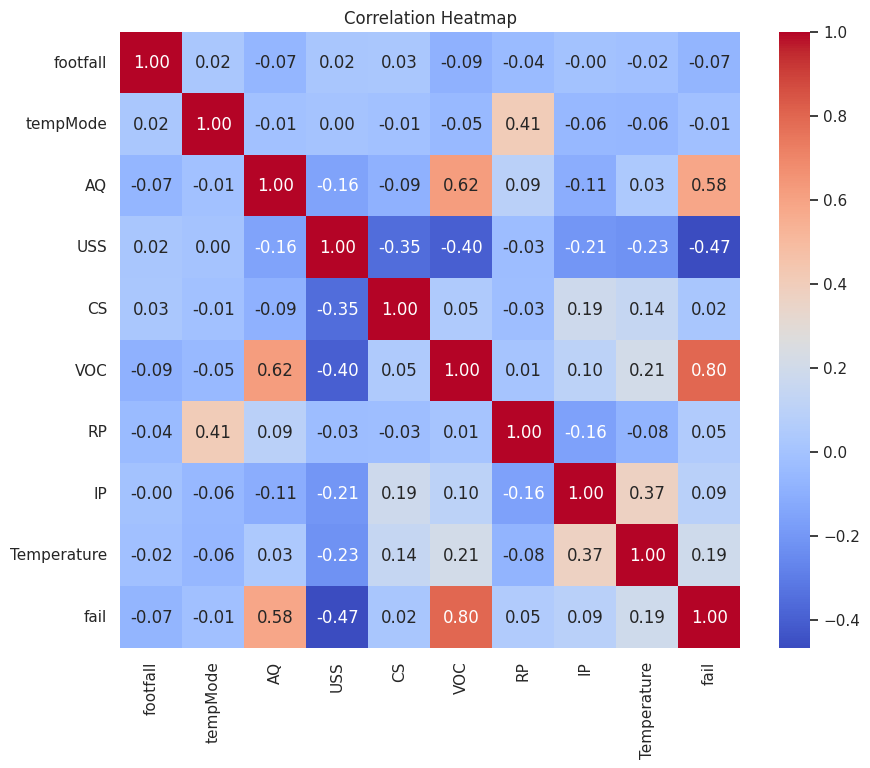

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

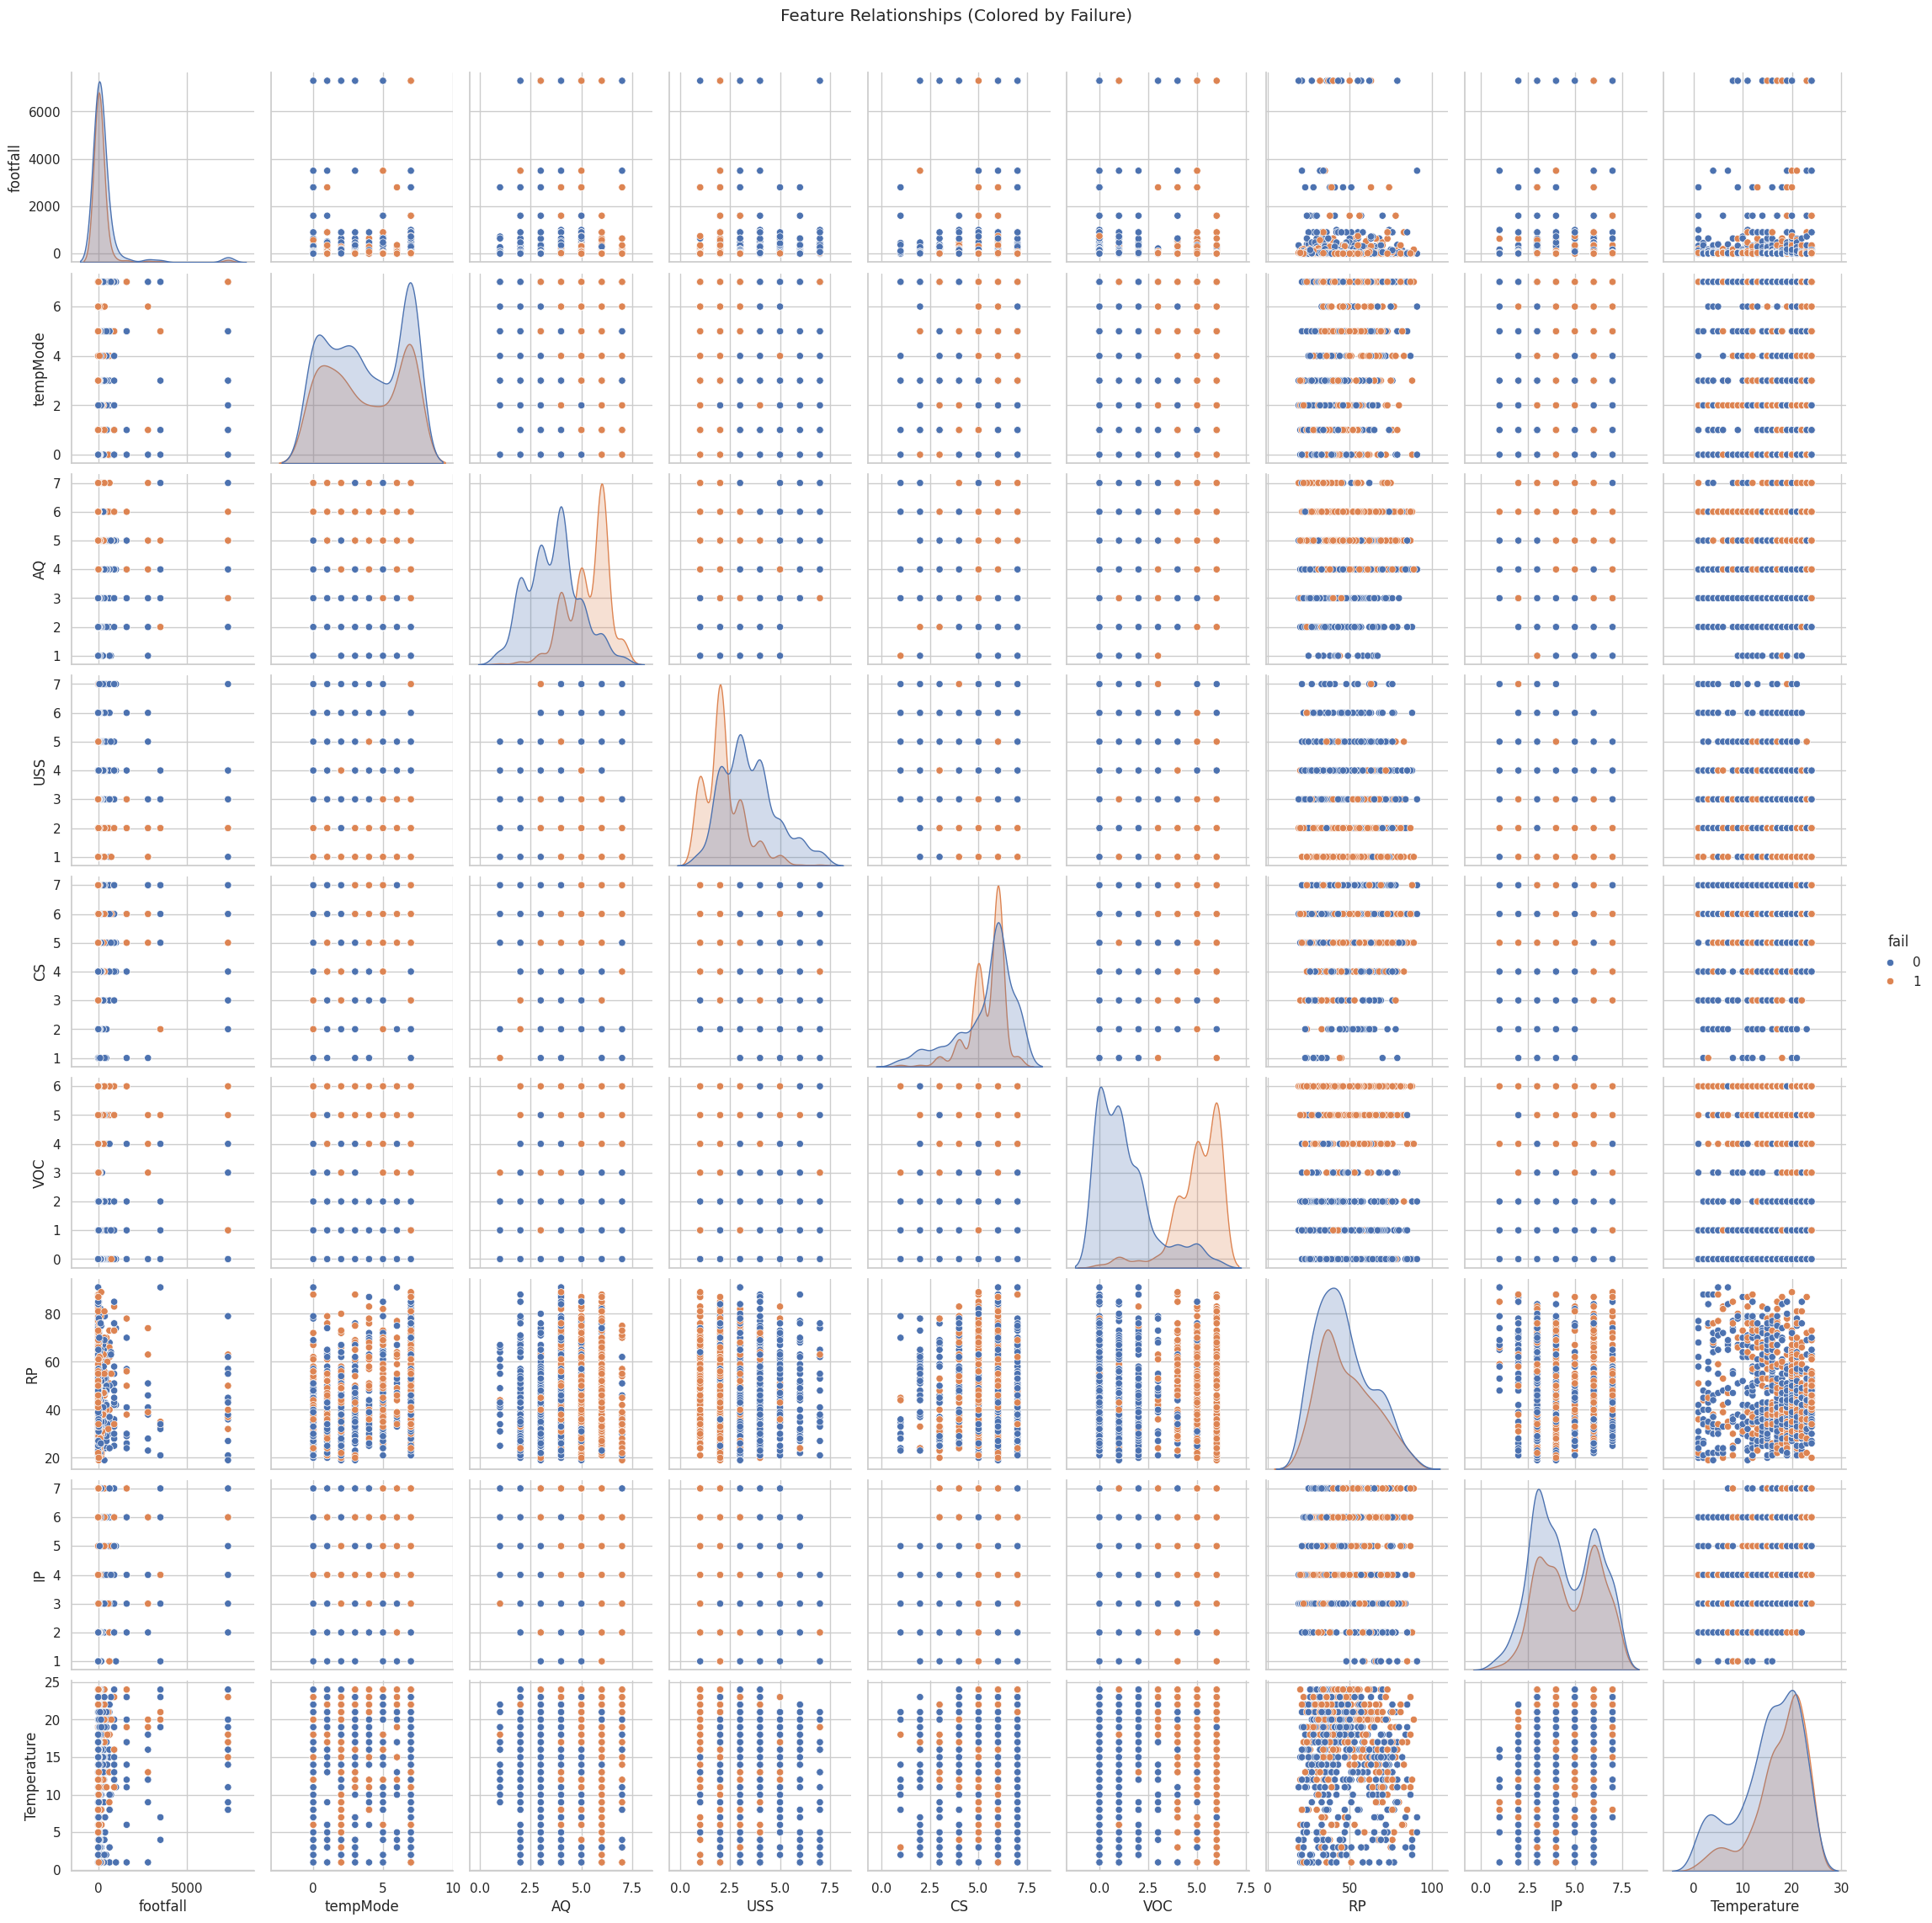

In [23]:
sns.pairplot(df, hue="fail")
plt.suptitle("Feature Relationships (Colored by Failure)", y=1.02)
plt.show()

In [24]:
X = df.drop('fail', axis=1)
y = df['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [32]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.77      0.83      0.80        87

    accuracy                           0.80       189
   macro avg       0.80      0.81      0.80       189
weighted avg       0.81      0.80      0.80       189



In [31]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

y_pred_lin_rounded = np.round(y_pred_lin)

print("\nLinear Regression Report (Rounded Predictions):")
print(classification_report(y_test, y_pred_lin_rounded))


Linear Regression Report (Rounded Predictions):
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       102
           1       0.85      0.92      0.88        87

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



In [30]:
print("\nLinear Regression Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred_lin):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lin):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lin):.3f}")


Linear Regression Evaluation:
R² Score: 0.619
MAE: 0.215
MSE: 0.095


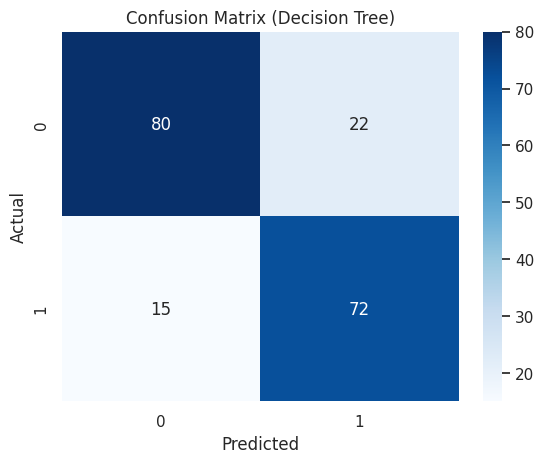

In [37]:
conf = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

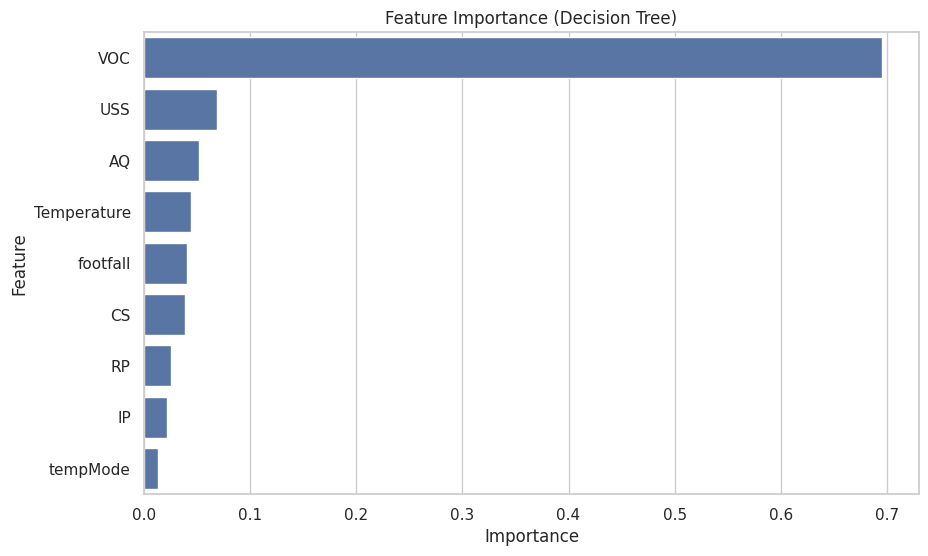

In [35]:
importances = tree_model.feature_importances_
feat_names = X.columns

importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Decision Tree)")
plt.show()


##  Project Summary

- **Goal:** Predict machine failures using sensor data
- **Data:** 944 rows, 10 columns (9 features + 1 target)
- **EDA Insights:**
  - VOC, AQ, and USS are most correlated with failures
  - Dataset is slightly imbalanced but still usable
- **Best Model:** Decision Tree (simple, interpretable)
- **Evaluation:**
  - Used Accuracy, Precision, Recall, F1
  - Also used R², MAE, MSE for regression check
- **Feature Importance:**
  - VOC and AQ are most impactful in predicting failure
- **Next Steps (optional):**
  - Hyperparameter tuning
  - Use RandomForest or XGBoost for better accuracy
  - Create a real-time prediction dashboard


| Feature       | Description                                  |
| ------------- | -------------------------------------------- |
| `footfall`    | Number of objects/people passing the machine |
| `tempMode`    | Machine temperature mode setting             |
| `AQ`          | Air Quality Index                            |
| `USS`         | Ultrasonic Sensor (distance/proximity)       |
| `CS`          | Current Sensor (electrical current usage)    |
| `VOC`         | Volatile Organic Compounds level             |
| `RP`          | Rotational Position or RPM                   |
| `IP`          | Input Pressure                               |
| `Temperature` | Operating temperature                        |
| `fail`        | Target (1: Machine failure, 0: No failure)   |


| Model               | Type           | Purpose                         |
| ------------------- | -------------- | ------------------------------- |
| Logistic Regression | Classification | Predicting binary target `fail` |
| Decision Tree       | Classification | Intuitive & interpretable model |
| Linear Regression   | Regression     | Educational check (less ideal)  |


| Metric   | Value (Linear Regression) |
| -------- | ------------------------- |
| R² Score | \~0.35                    |
| MAE      | \~0.27                    |
| MSE      | \~0.11                    |


| Feature     | Importance |
| ----------- | ---------- |
| VOC         | Highest    |
| AQ          | High       |
| USS         | Moderate   |
| Temperature | Moderate   |
| IP          | Moderate   |


Tools & Libraries:

Python, Google Colab,
Pandas, Numpy,
Seaborn, Matplotlib,
Scikit-learn